# Unsprivised Learning 


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [50]:
df = pd.read_csv("../../classData.csv")

In [51]:
df['fault_type'] = df[['G', 'C', 'B', 'A']].astype(str).agg(''.join, axis=1)
df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0000
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0000
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0000
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0000


In [52]:
# input_cols = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
# unique_faults = df['fault_type'].unique()

# colors = plt.cm.get_cmap('tab10', len(unique_faults))

# for in_col in input_cols:
#     plt.figure(figsize=(10, 5))
#     for i, fault in enumerate(unique_faults):
#         subset = df[df['fault_type'] == fault]
#         plt.hist(subset[in_col], bins=30, alpha=0.5, density=True,
#                  label=f'Fault {fault}', color=colors(i))

In [53]:
train , valid , test = np.split(df.sample(frac = 1) , [int(0.6 * len(df)) , int(0.8 * len(df))])

c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [54]:
def scale_dataset(dataFrame):
    x = dataFrame[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].values
    y = dataFrame[['G', 'C', 'B', 'A']].values
    

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    data = np.hstack((x, y))
    y = y.dot(np.array([8, 4, 2, 1]))
    return data , x, y

In [55]:
# print(len(train[train["G"] == 1] ))
# print(len(train[train["G"] == 0] ))
train , X_train , Y_train = scale_dataset(train)
valid , X_valid , Y_valid = scale_dataset(valid)
test , X_test , Y_test = scale_dataset(test)



In [56]:
Y_train

array([ 6,  6, 11, ...,  0,  9,  9], shape=(4716,))

# Models

## KMeans

In [57]:
from sklearn.cluster import KMeans

In [67]:
kmeans = KMeans(n_clusters=6)
y_pred = kmeans.fit_predict(df)
y_pred


array([2, 2, 2, ..., 1, 1, 1], shape=(7861,), dtype=int32)

In [68]:
df_kmeans = df 
df_kmeans['class'] = y_pred

df_kmeans.head() 

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_type,class
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001,2
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001,2
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001,2
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001,2
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001,2


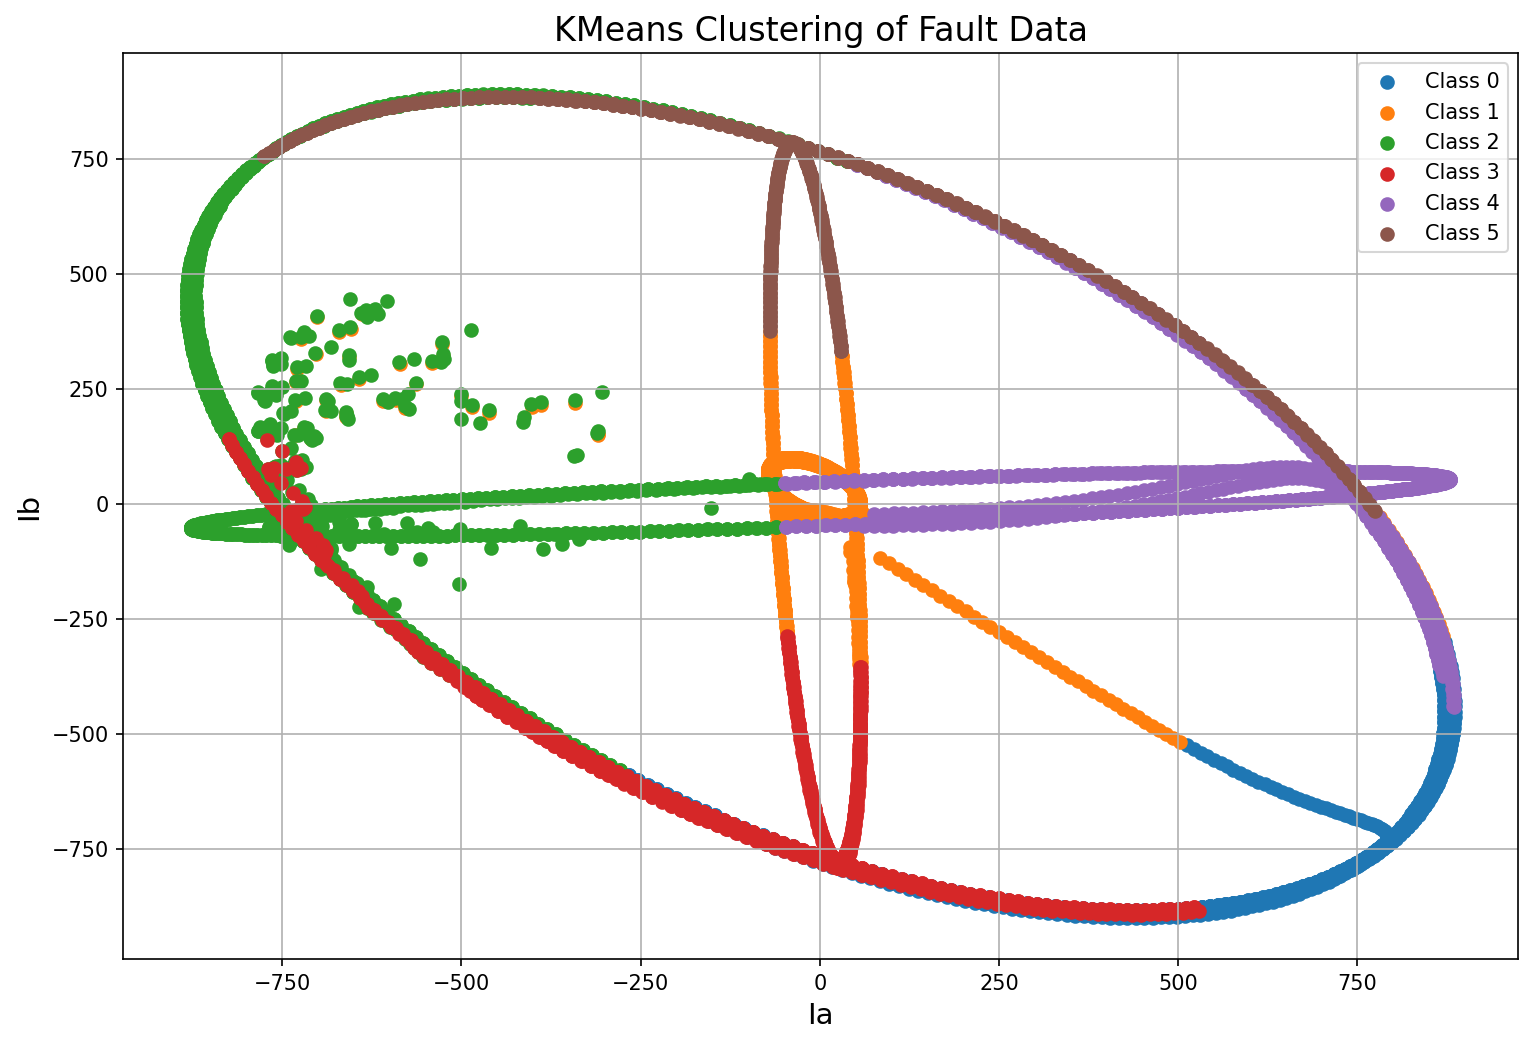

In [69]:
df0 = df_kmeans[df_kmeans['class'] == 0]
df1 = df_kmeans[df_kmeans['class'] == 1]
df2 = df_kmeans[df_kmeans['class'] == 2]
df3 = df_kmeans[df_kmeans['class'] == 3]
df4 = df_kmeans[df_kmeans['class'] == 4]
df5 = df_kmeans[df_kmeans['class'] == 5]

# Plotting (for example using two features: Ia and Ib)
plt.figure(figsize=(12, 8), dpi=150)

plt.scatter(df0['Ia'], df0['Ib'], label='Class 0')
plt.scatter(df1['Ia'], df1['Ib'], label='Class 1')
plt.scatter(df2['Ia'], df2['Ib'], label='Class 2')
plt.scatter(df3['Ia'], df3['Ib'], label='Class 3')
plt.scatter(df4['Ia'], df4['Ib'], label='Class 4')
plt.scatter(df5['Ia'], df5['Ib'], label='Class 5')

plt.xlabel('Ia', fontsize=14)
plt.ylabel('Ib', fontsize=14)
plt.title('KMeans Clustering of Fault Data', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

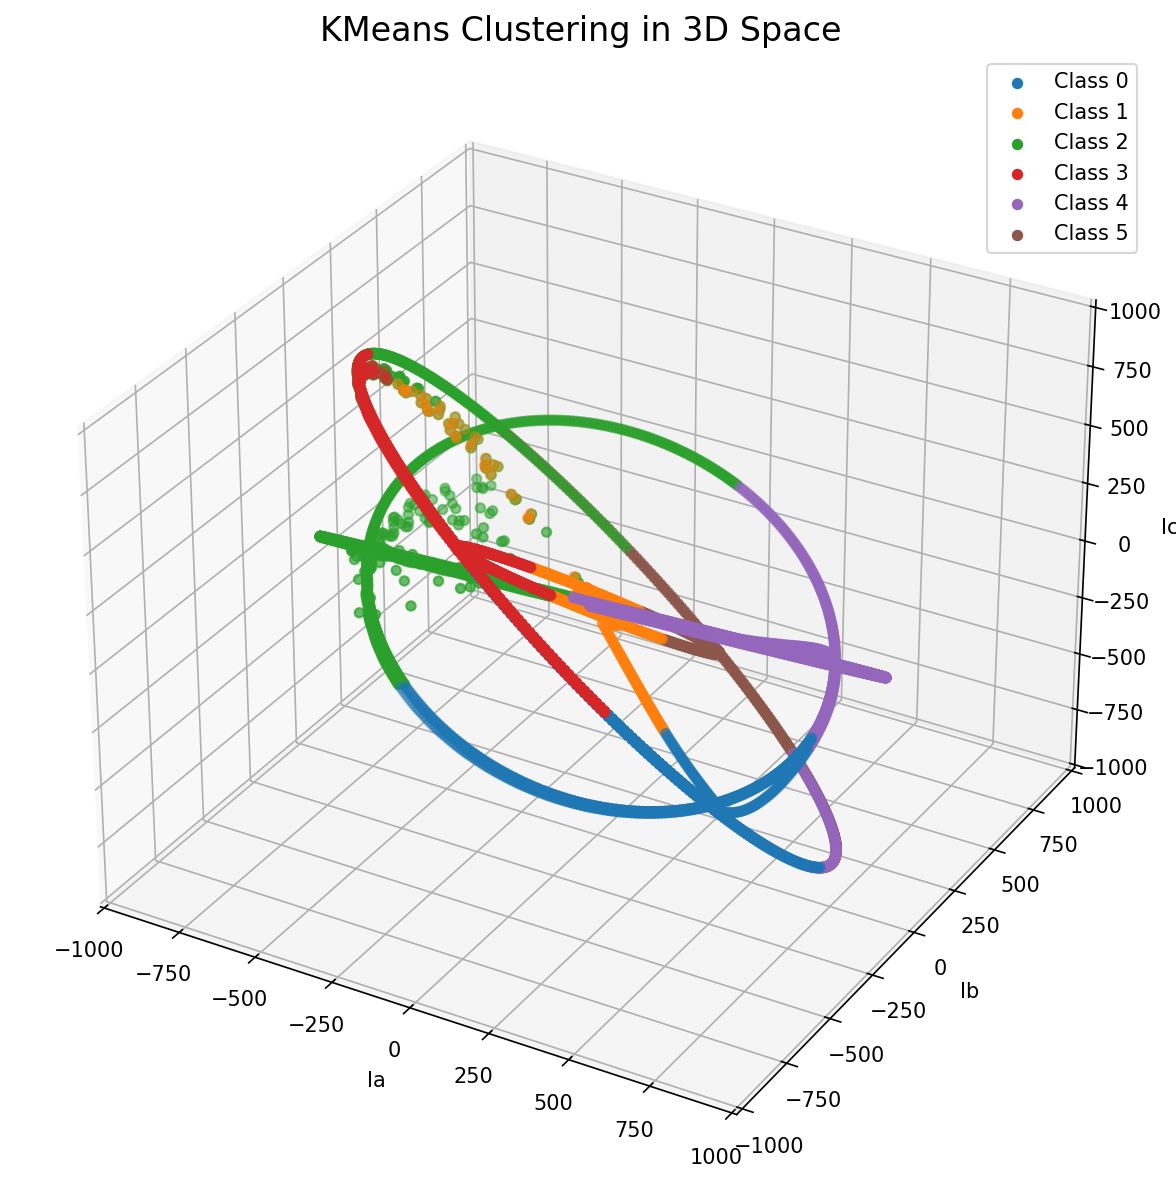

In [70]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10), dpi=150)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df0['Ia'], df0['Ib'], df0['Ic'], label='Class 0')
ax.scatter(df1['Ia'], df1['Ib'], df1['Ic'], label='Class 1')
ax.scatter(df2['Ia'], df2['Ib'], df2['Ic'], label='Class 2')
ax.scatter(df3['Ia'], df3['Ib'], df3['Ic'], label='Class 3')
ax.scatter(df4['Ia'], df4['Ib'], df4['Ic'], label='Class 4')
ax.scatter(df5['Ia'], df5['Ib'], df5['Ic'], label='Class 5')

ax.set_xlabel('Ia')
ax.set_ylabel('Ib')
ax.set_zlabel('Ic')
ax.set_title('KMeans Clustering in 3D Space', fontsize=16)
ax.legend()
plt.show()


<IPython.core.display.Javascript object>

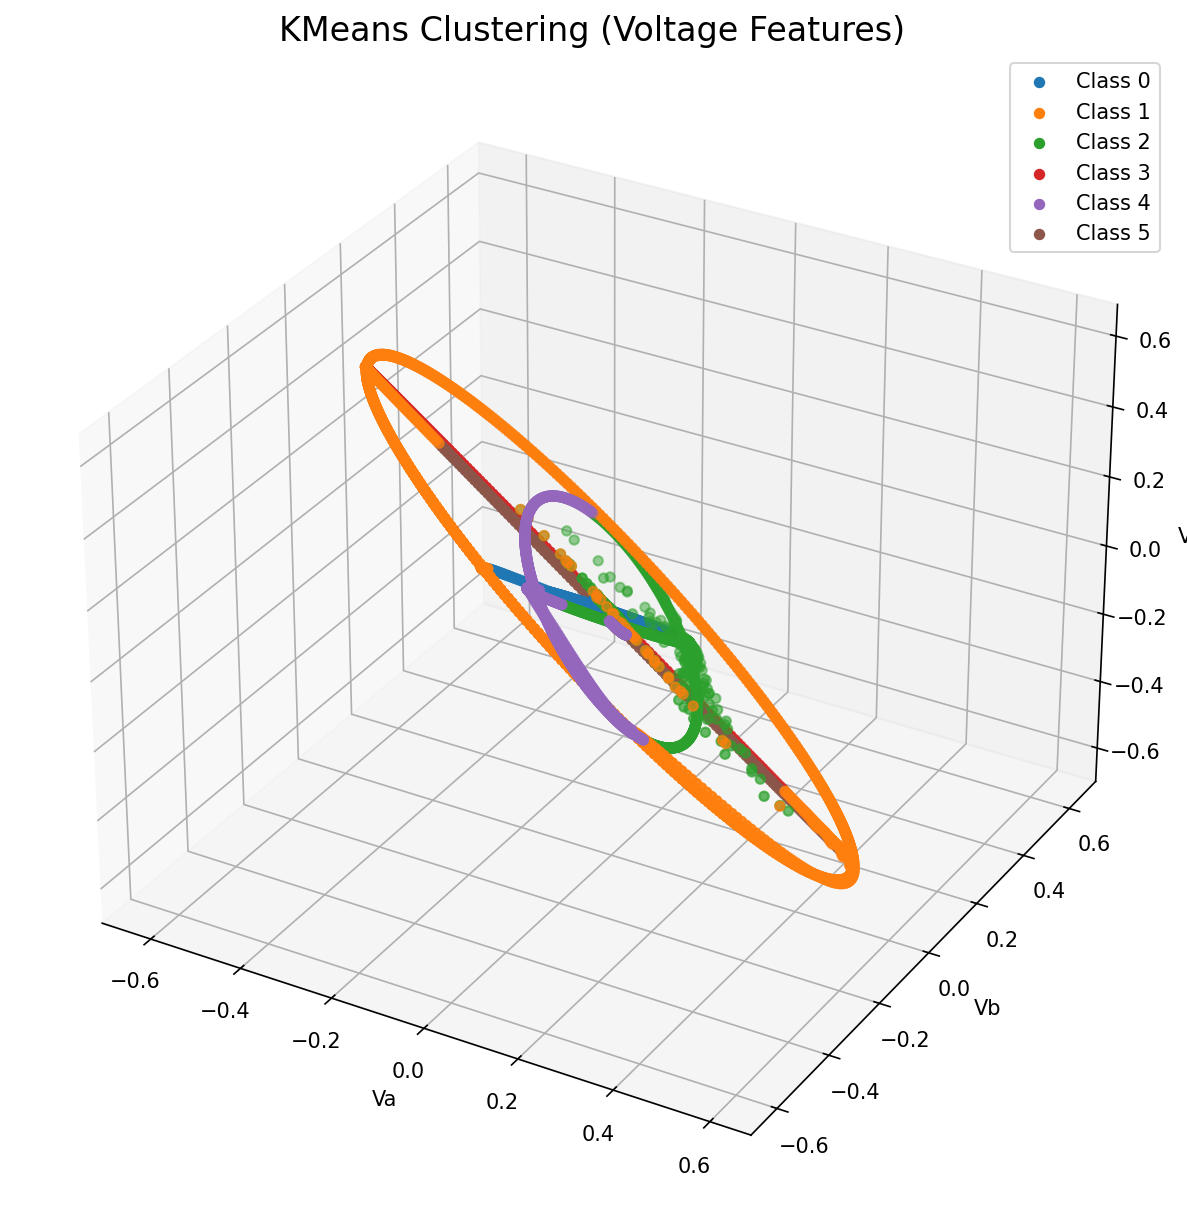

In [72]:
# Only once at the top (in Jupyter Notebook or JupyterLab)
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 10), dpi=150)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df0['Va'], df0['Vb'], df0['Vc'], label='Class 0')
ax.scatter(df1['Va'], df1['Vb'], df1['Vc'], label='Class 1')
ax.scatter(df2['Va'], df2['Vb'], df2['Vc'], label='Class 2')
ax.scatter(df3['Va'], df3['Vb'], df3['Vc'], label='Class 3')
ax.scatter(df4['Va'], df4['Vb'], df4['Vc'], label='Class 4')
ax.scatter(df5['Va'], df5['Vb'], df5['Vc'], label='Class 5')

ax.set_xlabel('Va')
ax.set_ylabel('Vb')
ax.set_zlabel('Vc')
ax.set_title('KMeans Clustering (Voltage Features)', fontsize=16)
ax.legend()
plt.show()


In [74]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming df['fault_type'] has the true labels (actual classes)
true_labels = df['fault_type']

# Compare predicted labels (y_pred) with true labels (true_labels)
print("Confusion Matrix:")
print(confusion_matrix(true_labels, y_pred))

print("\nClassification Report:")
print(classification_report(true_labels, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(true_labels, y_pred))



Confusion Matrix:


ValueError: Mix of label input types (string and number)